# 데이터

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv('./data.csv')
Data

,date,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,...,q_ar5,q_ar6,q_ar7,r_ar1,r_ar2,r_ar3,r_ar4,r_ar5,r_ar6,r_ar7
0,2019-07-01 00:00:00+09:00,0.0,0.0,-29.27220,24.0,1.6,252.0,80.0,3.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-01 01:00:00+09:00,0.0,0.0,-29.40307,23.7,1.5,253.7,81.7,3.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-01 02:00:00+09:00,0.0,0.0,-26.39168,23.3,1.4,255.3,83.3,3.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-01 03:00:00+09:00,0.0,0.0,-20.49290,23.0,1.3,257.0,85.0,3.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-01 04:00:00+09:00,0.0,0.0,-12.50007,23.0,1.2,254.3,85.0,3.0,13.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,2020-07-31 19:00:00+09:00,NaN,NaN,6.15018,27.3,1.9,233.7,81.7,4.0,50.0,...,0.233,1.434,0.503,NaN,NaN,0.12,0.25,0.20,0.23,0.25
9524,2020-07-31 20:00:00+09:00,NaN,NaN,-4.50392,26.7,1.7,219.3,83.3,4.0,40.0,...,0.000,0.004,0.012,NaN,NaN,0.09,0.11,0.09,0.09,0.07
9525,2020-07-31 21:00:00+09:00,NaN,NaN,-15.01526,26.0,1.4,205.0,85.0,4.0,30.0,...,0.000,0.000,0.000,NaN,NaN,0.00,0.00,0.00,0.00,0.00
9526,2020-07-31 22:00:00+09:00,NaN,NaN,-23.49217,25.7,1.3,203.3,86.7,4.0,30.0,...,0.000,0.000,0.000,NaN,NaN,0.00,0.00,0.00,0.00,0.00


In [3]:
Data['date'] = pd.to_datetime(Data['date'])

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype                                
---  ------                  --------------  -----                                
 0   date                    9528 non-null   datetime64[ns, pytz.FixedOffset(540)]
 1   quantity                9408 non-null   float64                              
 2   radiation               9466 non-null   float64                              
 3   altitude                9528 non-null   float64                              
 4   pre_temperature         8806 non-null   float64                              
 5   pre_wind_speed          8806 non-null   float64                              
 6   pre_wind_direction      8806 non-null   float64                              
 7   pre_humidity            8806 non-null   float64                              
 8   pre_cloud               8806 non-null   float64           

In [5]:
Data.isna().sum()

date                        0
quantity                  120
radiation                  62
altitude                    0
pre_temperature           722
pre_wind_speed            722
pre_wind_direction        722
pre_humidity              722
pre_cloud                 722
pre_rain                  722
radiation_st_mean           0
radiation_st_quantile1      0
radiation_st_quantile2      0
radiation_st_quantile3      0
quantity_st_mean            0
quantity_st_quantile1       0
quantity_st_quantile2       0
quantity_st_quantile3       0
radiation_ct_mean         722
radiation_ct_quantile1    722
radiation_ct_quantile2    722
radiation_ct_quantile3    722
quantity_ct_mean          722
quantity_ct_quantile1     722
quantity_ct_quantile2     722
quantity_ct_quantile3     722
q_ar1                     120
q_ar2                     120
q_ar3                     144
q_ar4                     168
q_ar5                     192
q_ar6                     216
q_ar7                     240
r_ar1     

In [6]:
Data[Data.quantity.isna()==True]

,date,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,...,q_ar5,q_ar6,q_ar7,r_ar1,r_ar2,r_ar3,r_ar4,r_ar5,r_ar6,r_ar7
5136,2020-01-31 00:00:00+09:00,NaN,0.0,-68.34425,3.0,0.8,40.0,70.0,3.0,20.0,...,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00
5137,2020-01-31 01:00:00+09:00,NaN,0.0,-70.29034,2.7,0.8,38.0,73.3,3.0,23.3,...,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00
5138,2020-01-31 02:00:00+09:00,NaN,0.0,-64.28199,2.3,0.7,36.0,76.7,3.0,26.7,...,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00
5139,2020-01-31 03:00:00+09:00,NaN,0.0,-54.24068,2.0,0.7,34.0,80.0,4.0,30.0,...,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00
5140,2020-01-31 04:00:00+09:00,NaN,0.0,-42.54358,1.7,0.7,41.3,81.7,4.0,30.0,...,0.000,0.000,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,2020-07-31 19:00:00+09:00,NaN,NaN,6.15018,27.3,1.9,233.7,81.7,4.0,50.0,...,0.233,1.434,0.503,NaN,NaN,0.12,0.25,0.20,0.23,0.25
9524,2020-07-31 20:00:00+09:00,NaN,NaN,-4.50392,26.7,1.7,219.3,83.3,4.0,40.0,...,0.000,0.004,0.012,NaN,NaN,0.09,0.11,0.09,0.09,0.07
9525,2020-07-31 21:00:00+09:00,NaN,NaN,-15.01526,26.0,1.4,205.0,85.0,4.0,30.0,...,0.000,0.000,0.000,NaN,NaN,0.00,0.00,0.00,0.00,0.00
9526,2020-07-31 22:00:00+09:00,NaN,NaN,-23.49217,25.7,1.3,203.3,86.7,4.0,30.0,...,0.000,0.000,0.000,NaN,NaN,0.00,0.00,0.00,0.00,0.00


In [7]:
Data.corr()

,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,...,q_ar5,q_ar6,q_ar7,r_ar1,r_ar2,r_ar3,r_ar4,r_ar5,r_ar6,r_ar7
quantity,1.000000,0.932249,0.752267,0.192926,0.157282,0.084950,-0.446629,-0.185895,-0.190683,0.847947,...,0.787616,0.798715,0.790019,0.782616,0.757549,0.751355,0.744196,0.751741,0.761751,0.746219
radiation,0.932249,1.000000,0.768413,0.306190,0.192794,0.089345,-0.503333,-0.175339,-0.171945,0.875979,...,0.751404,0.760677,0.759780,0.819875,0.787569,0.780530,0.771949,0.781003,0.792602,0.782106
altitude,0.752267,0.768413,1.000000,0.402090,0.243677,0.025032,-0.306392,0.001775,0.026536,0.868277,...,0.756653,0.757202,0.757842,0.768686,0.768944,0.769399,0.770040,0.770495,0.770883,0.771290
pre_temperature,0.192926,0.306190,0.402090,1.000000,0.167079,-0.224053,0.085471,0.106263,0.158168,0.302812,...,0.206596,0.208178,0.210237,0.309190,0.309305,0.310395,0.309743,0.310948,0.316587,0.318497
pre_wind_speed,0.157282,0.192794,0.243677,0.167079,1.000000,0.075289,-0.187078,0.111392,0.245556,0.262684,...,0.187492,0.189033,0.195328,0.195416,0.213560,0.231772,0.223539,0.220065,0.223083,0.234537
pre_wind_direction,0.084950,0.089345,0.025032,-0.224053,0.075289,1.000000,-0.236672,-0.120535,-0.174242,0.070310,...,0.060443,0.052847,0.027232,0.000872,0.026797,0.017280,0.052749,0.068647,0.056014,0.031013
pre_humidity,-0.446629,-0.503333,-0.306392,0.085471,-0.187078,-0.236672,1.000000,0.396787,0.447783,-0.416042,...,-0.303072,-0.326031,-0.316149,-0.414801,-0.379189,-0.365295,-0.355865,-0.359252,-0.375805,-0.358104
pre_cloud,-0.185895,-0.175339,0.001775,0.106263,0.111392,-0.120535,0.396787,1.000000,0.815419,-0.021885,...,-0.024253,-0.038957,-0.015248,-0.068642,-0.032682,-0.020219,-0.003441,-0.019874,-0.035424,-0.006789
pre_rain,-0.190683,-0.171945,0.026536,0.158168,0.245556,-0.174242,0.447783,0.815419,1.000000,-0.004009,...,-0.012450,-0.029464,-0.000963,-0.052432,-0.018280,0.003116,0.010387,-0.003889,-0.021285,0.014471
radiation_st_mean,0.847947,0.875979,0.868277,0.302812,0.262684,0.070310,-0.416042,-0.021885,-0.004009,1.000000,...,0.846345,0.846982,0.848408,0.875719,0.873439,0.873500,0.873816,0.872197,0.872221,0.872961


# 일사량예측

In [8]:
Data.columns

Index(['date', 'quantity', 'radiation', 'altitude', 'pre_temperature',
       'pre_wind_speed', 'pre_wind_direction', 'pre_humidity', 'pre_cloud',
       'pre_rain', 'radiation_st_mean', 'radiation_st_quantile1',
       'radiation_st_quantile2', 'radiation_st_quantile3', 'quantity_st_mean',
       'quantity_st_quantile1', 'quantity_st_quantile2',
       'quantity_st_quantile3', 'radiation_ct_mean', 'radiation_ct_quantile1',
       'radiation_ct_quantile2', 'radiation_ct_quantile3', 'quantity_ct_mean',
       'quantity_ct_quantile1', 'quantity_ct_quantile2',
       'quantity_ct_quantile3', 'q_ar1', 'q_ar2', 'q_ar3', 'q_ar4', 'q_ar5',
       'q_ar6', 'q_ar7', 'r_ar1', 'r_ar2', 'r_ar3', 'r_ar4', 'r_ar5', 'r_ar6',
       'r_ar7'],
      dtype='object')

In [9]:
data1 = Data[['date', 'radiation', 'altitude', 'pre_temperature',
       'pre_wind_speed', 'pre_wind_direction', 'pre_humidity', 'pre_cloud',
       'pre_rain', 'radiation_st_mean', 'radiation_st_quantile1',
       'radiation_st_quantile2', 'radiation_st_quantile3',
       'radiation_ct_mean', 'radiation_ct_quantile1',
       'radiation_ct_quantile2', 'radiation_ct_quantile3',
       'r_ar3', 'r_ar4', 'r_ar5', 'r_ar6', 'r_ar7']]
data1

,date,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,...,radiation_st_quantile3,radiation_ct_mean,radiation_ct_quantile1,radiation_ct_quantile2,radiation_ct_quantile3,r_ar3,r_ar4,r_ar5,r_ar6,r_ar7
0,2019-07-01 00:00:00+09:00,0.0,-29.27220,24.0,1.6,252.0,80.0,3.0,20.0,0.000,...,0.00,0.000,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN
1,2019-07-01 01:00:00+09:00,0.0,-29.40307,23.7,1.5,253.7,81.7,3.0,20.0,0.000,...,0.00,0.000,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN
2,2019-07-01 02:00:00+09:00,0.0,-26.39168,23.3,1.4,255.3,83.3,3.0,20.0,0.000,...,0.00,0.000,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN
3,2019-07-01 03:00:00+09:00,0.0,-20.49290,23.0,1.3,257.0,85.0,3.0,20.0,0.000,...,0.00,0.000,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN
4,2019-07-01 04:00:00+09:00,0.0,-12.50007,23.0,1.2,254.3,85.0,3.0,13.3,0.000,...,0.00,0.000,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,2020-07-31 19:00:00+09:00,NaN,6.15018,27.3,1.9,233.7,81.7,4.0,50.0,0.351,...,0.50,0.107,0.0,0.04,0.162,0.12,0.25,0.20,0.23,0.25
9524,2020-07-31 20:00:00+09:00,NaN,-4.50392,26.7,1.7,219.3,83.3,4.0,40.0,0.091,...,0.12,0.026,0.0,0.00,0.042,0.09,0.11,0.09,0.09,0.07
9525,2020-07-31 21:00:00+09:00,NaN,-15.01526,26.0,1.4,205.0,85.0,4.0,30.0,0.000,...,0.00,0.000,0.0,0.00,0.000,0.00,0.00,0.00,0.00,0.00
9526,2020-07-31 22:00:00+09:00,NaN,-23.49217,25.7,1.3,203.3,86.7,4.0,30.0,0.000,...,0.00,0.000,0.0,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [10]:
data1.corr()

,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,radiation_st_quantile1,...,radiation_st_quantile3,radiation_ct_mean,radiation_ct_quantile1,radiation_ct_quantile2,radiation_ct_quantile3,r_ar3,r_ar4,r_ar5,r_ar6,r_ar7
radiation,1.000000,0.768413,0.306190,0.192794,0.089345,-0.503333,-0.175339,-0.171945,0.875979,0.857574,...,0.874243,0.877511,0.852292,0.873036,0.873257,0.780530,0.771949,0.781003,0.792602,0.782106
altitude,0.768413,1.000000,0.402090,0.243677,0.025032,-0.306392,0.001775,0.026536,0.868277,0.813782,...,0.875985,0.798719,0.690865,0.760400,0.827910,0.769399,0.770040,0.770495,0.770883,0.771290
pre_temperature,0.306190,0.402090,1.000000,0.167079,-0.224053,0.085471,0.106263,0.158168,0.302812,0.259523,...,0.318430,0.152917,0.126300,0.143711,0.158124,0.310395,0.309743,0.310948,0.316587,0.318497
pre_wind_speed,0.192794,0.243677,0.167079,1.000000,0.075289,-0.187078,0.111392,0.245556,0.262684,0.268936,...,0.259127,0.176541,0.135694,0.162727,0.186510,0.231772,0.223539,0.220065,0.223083,0.234537
pre_wind_direction,0.089345,0.025032,-0.224053,0.075289,1.000000,-0.236672,-0.120535,-0.174242,0.070310,0.079868,...,0.065452,0.094992,0.089473,0.096618,0.095181,0.017280,0.052749,0.068647,0.056014,0.031013
pre_humidity,-0.503333,-0.306392,0.085471,-0.187078,-0.236672,1.000000,0.396787,0.447783,-0.416042,-0.436455,...,-0.403561,-0.485561,-0.481290,-0.494945,-0.478012,-0.365295,-0.355865,-0.359252,-0.375805,-0.358104
pre_cloud,-0.175339,0.001775,0.106263,0.111392,-0.120535,0.396787,1.000000,0.815419,-0.021885,-0.034418,...,-0.018578,-0.200280,-0.279217,-0.248176,-0.168913,-0.020219,-0.003441,-0.019874,-0.035424,-0.006789
pre_rain,-0.171945,0.026536,0.158168,0.245556,-0.174242,0.447783,0.815419,1.000000,-0.004009,-0.017569,...,0.000017,-0.165352,-0.234404,-0.204030,-0.140225,0.003116,0.010387,-0.003889,-0.021285,0.014471
radiation_st_mean,0.875979,0.868277,0.302812,0.262684,0.070310,-0.416042,-0.021885,-0.004009,1.000000,0.978929,...,0.998009,0.900822,0.822928,0.873492,0.915992,0.873500,0.873816,0.872197,0.872221,0.872961
radiation_st_quantile1,0.857574,0.813782,0.259523,0.268936,0.079868,-0.436455,-0.034418,-0.017569,0.978929,1.000000,...,0.965165,0.867257,0.802756,0.844552,0.877698,0.851860,0.851173,0.847242,0.846866,0.848187


In [11]:
data1 = data1.set_index('date')
data1

,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,radiation_st_quantile1,...,radiation_st_quantile3,radiation_ct_mean,radiation_ct_quantile1,radiation_ct_quantile2,radiation_ct_quantile3,r_ar3,r_ar4,r_ar5,r_ar6,r_ar7
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:00:00+09:00,0.0,-29.27220,24.0,1.6,252.0,80.0,3.0,20.0,0.000,0.000,...,0.00,0.000,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN
2019-07-01 01:00:00+09:00,0.0,-29.40307,23.7,1.5,253.7,81.7,3.0,20.0,0.000,0.000,...,0.00,0.000,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN
2019-07-01 02:00:00+09:00,0.0,-26.39168,23.3,1.4,255.3,83.3,3.0,20.0,0.000,0.000,...,0.00,0.000,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN
2019-07-01 03:00:00+09:00,0.0,-20.49290,23.0,1.3,257.0,85.0,3.0,20.0,0.000,0.000,...,0.00,0.000,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN
2019-07-01 04:00:00+09:00,0.0,-12.50007,23.0,1.2,254.3,85.0,3.0,13.3,0.000,0.000,...,0.00,0.000,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31 19:00:00+09:00,NaN,6.15018,27.3,1.9,233.7,81.7,4.0,50.0,0.351,0.208,...,0.50,0.107,0.0,0.04,0.162,0.12,0.25,0.20,0.23,0.25
2020-07-31 20:00:00+09:00,NaN,-4.50392,26.7,1.7,219.3,83.3,4.0,40.0,0.091,0.060,...,0.12,0.026,0.0,0.00,0.042,0.09,0.11,0.09,0.09,0.07
2020-07-31 21:00:00+09:00,NaN,-15.01526,26.0,1.4,205.0,85.0,4.0,30.0,0.000,0.000,...,0.00,0.000,0.0,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [12]:
# 제출할 복원날짜 제외

cond1 = (data1.index.month==1)|(data1.index.month==3)|(data1.index.month==5)
pre_data1 = data1[cond1&(data1.index.day==31)]
data1 = data1.drop(pre_data1.index)

In [13]:
# train - test

test1 = data1.iloc[-24:,]
train1 = data1.drop(test1.index).dropna()
test1

,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,radiation_st_quantile1,...,radiation_st_quantile3,radiation_ct_mean,radiation_ct_quantile1,radiation_ct_quantile2,radiation_ct_quantile3,r_ar3,r_ar4,r_ar5,r_ar6,r_ar7
date,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00+09:00,NaN,-34.10476,25.0,1.2,222.0,90.0,4.0,30.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00
2020-07-31 01:00:00+09:00,NaN,-34.35301,25.0,1.2,223.0,90.0,4.0,30.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00
2020-07-31 02:00:00+09:00,NaN,-31.28340,25.0,1.1,224.0,90.0,4.0,30.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00
2020-07-31 03:00:00+09:00,NaN,-25.21020,25.0,1.1,225.0,90.0,4.0,30.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00
2020-07-31 04:00:00+09:00,NaN,-16.59162,24.7,1.1,219.7,91.7,4.0,30.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00
2020-07-31 05:00:00+09:00,NaN,-7.05287,24.3,1.0,214.3,93.3,4.0,30.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00
2020-07-31 06:00:00+09:00,NaN,3.48460,24.0,1.0,209.0,95.0,4.0,30.0,0.056,0.040,...,0.070,0.015,0.000,0.000,0.030,0.05,0.06,0.06,0.06,0.05
2020-07-31 07:00:00+09:00,NaN,15.21018,24.3,1.1,219.3,93.3,4.0,30.0,0.256,0.140,...,0.330,0.078,0.000,0.045,0.130,0.13,0.17,0.45,0.12,0.10
2020-07-31 08:00:00+09:00,NaN,27.14225,24.7,1.3,229.7,91.7,4.0,30.0,0.631,0.370,...,0.910,0.228,0.010,0.140,0.385,0.38,0.48,0.74,0.33,0.11


In [14]:
# 태양고도 -10 이하에서 유의미한 일사량 존재 X

data1[data1.altitude<=-8][data1.radiation>0.05][['radiation','altitude']]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,radiation,altitude
date,,
2019-08-16 20:00:00+09:00,0.06,-8.04233
2019-08-19 20:00:00+09:00,0.06,-8.49353
2019-08-21 20:00:00+09:00,0.06,-9.20502
2020-05-03 20:00:00+09:00,0.07,-8.00407


In [15]:
# 태양고도 -10 이하 train에서 제외

train1 = train1.drop(train1.index[train1.altitude<=-10],axis=0)
train1

,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,radiation_st_quantile1,...,radiation_st_quantile3,radiation_ct_mean,radiation_ct_quantile1,radiation_ct_quantile2,radiation_ct_quantile3,r_ar3,r_ar4,r_ar5,r_ar6,r_ar7
date,,,,,,,,,,,,,,,,,,,,,
2019-07-08 05:00:00+09:00,0.00,-3.55146,20.3,1.1,44.7,73.3,4.0,23.3,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00
2019-07-08 06:00:00+09:00,0.01,6.42093,20.0,1.0,29.0,75.0,3.0,20.0,0.056,0.040,...,0.070,0.018,0.000,0.000,0.040,0.05,0.05,0.05,0.07,0.07
2019-07-08 07:00:00+09:00,0.24,18.01517,21.0,1.2,50.3,70.0,3.0,23.3,0.256,0.140,...,0.330,0.121,0.000,0.050,0.220,0.45,0.51,0.28,0.43,0.24
2019-07-08 08:00:00+09:00,0.68,29.47506,22.0,1.5,71.7,65.0,3.0,26.7,0.631,0.370,...,0.910,0.399,0.070,0.360,0.680,1.17,1.18,0.44,1.23,0.31
2019-07-08 09:00:00+09:00,2.15,41.46141,23.0,1.7,93.0,60.0,4.0,30.0,1.084,0.640,...,1.590,0.539,0.155,0.370,0.840,1.73,1.87,0.75,1.69,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 16:00:00+09:00,0.50,43.55259,22.3,4.1,330.3,71.7,4.0,50.0,1.594,0.867,...,2.268,0.849,0.322,0.655,1.238,1.42,2.63,0.76,0.57,0.87
2020-06-30 17:00:00+09:00,0.28,31.56288,22.7,4.3,325.7,68.3,4.0,40.0,1.215,0.745,...,1.693,0.528,0.143,0.325,0.705,0.76,1.69,0.29,0.31,0.85
2020-06-30 18:00:00+09:00,0.24,20.08429,23.0,4.5,321.0,65.0,4.0,30.0,0.788,0.425,...,1.122,0.278,0.040,0.165,0.405,0.87,0.92,0.27,0.17,0.46


In [16]:
# 태양고도 -10 이하 test에서 인덱스

test1_reset = test1.reset_index()
test1_idx = test1_reset[test1_reset.altitude<=-10].index
test1_idx = list(test1_idx)
test1_idx

[0, 1, 2, 3, 4, 21, 22, 23]

In [17]:
# train - test 나누기

y_test1 = test1['radiation']
X_test1 = test1.drop('radiation',axis=1)

y_train1 = train1['radiation']
X_train1 = train1.drop('radiation',axis=1)

In [18]:
# 스케일링

scaler = MinMaxScaler()
scaler.fit(X_train1)
X_train1_scaled = scaler.transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

In [19]:
# 모델평가

np.mean(cross_val_score(SVR(), X_train1_scaled, y_train1))

0.8165909066006701

In [20]:
# 그리드서치

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = {'gamma':param_range, 'C':param_range}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)

In [21]:
grid_search.fit(X_train1_scaled, y_train1)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
grid_search.best_estimator_

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
grid_search.best_score_

0.8187233778704865

In [24]:
predict_r = grid_search.predict(X_test1_scaled)
predict_r

array([-0.10812163, -0.10885111, -0.10168577, -0.08441816, -0.05797982,
       -0.02446157,  0.02255417,  0.16493065,  0.35979034,  0.56896454,
        0.91097604,  1.28616234,  1.62987457,  1.54608276,  1.58239431,
        1.1323634 ,  0.91776064,  0.66699595,  0.32659868,  0.14282377,
        0.04572499, -0.02520088, -0.06668765, -0.0931657 ])

In [25]:
# 태양고도가 -10 이하이거나 음수인 경우 예측값 0으로

predict_r[test1_idx] = 0
predict_r[predict_r<0] = 0
predict_r

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02255417, 0.16493065, 0.35979034, 0.56896454,
       0.91097604, 1.28616234, 1.62987457, 1.54608276, 1.58239431,
       1.1323634 , 0.91776064, 0.66699595, 0.32659868, 0.14282377,
       0.04572499, 0.        , 0.        , 0.        ])

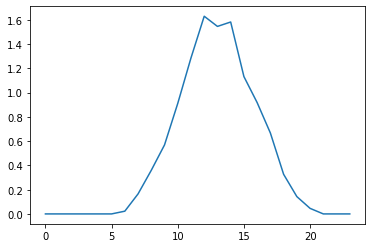

In [26]:
plt.plot(predict_r)

# 발전량예측

In [27]:
Data.columns

Index(['date', 'quantity', 'radiation', 'altitude', 'pre_temperature',
       'pre_wind_speed', 'pre_wind_direction', 'pre_humidity', 'pre_cloud',
       'pre_rain', 'radiation_st_mean', 'radiation_st_quantile1',
       'radiation_st_quantile2', 'radiation_st_quantile3', 'quantity_st_mean',
       'quantity_st_quantile1', 'quantity_st_quantile2',
       'quantity_st_quantile3', 'radiation_ct_mean', 'radiation_ct_quantile1',
       'radiation_ct_quantile2', 'radiation_ct_quantile3', 'quantity_ct_mean',
       'quantity_ct_quantile1', 'quantity_ct_quantile2',
       'quantity_ct_quantile3', 'q_ar1', 'q_ar2', 'q_ar3', 'q_ar4', 'q_ar5',
       'q_ar6', 'q_ar7', 'r_ar1', 'r_ar2', 'r_ar3', 'r_ar4', 'r_ar5', 'r_ar6',
       'r_ar7'],
      dtype='object')

In [28]:
data2 = Data[['date', 'quantity', 'radiation', 'altitude', 'pre_temperature',
       'pre_wind_speed', 'pre_wind_direction', 'pre_humidity', 'pre_cloud',
       'pre_rain', 'radiation_st_mean', 'radiation_st_quantile1',
       'radiation_st_quantile2', 'radiation_st_quantile3', 'quantity_st_mean',
       'quantity_st_quantile1', 'quantity_st_quantile2',
       'quantity_st_quantile3', 'radiation_ct_mean', 'radiation_ct_quantile1',
       'radiation_ct_quantile2', 'radiation_ct_quantile3', 'quantity_ct_mean',
       'quantity_ct_quantile1', 'quantity_ct_quantile2',
       'quantity_ct_quantile3', 'q_ar2', 'q_ar3', 'q_ar4', 'q_ar5',
       'q_ar6', 'q_ar7']]
data2

,date,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,...,quantity_ct_mean,quantity_ct_quantile1,quantity_ct_quantile2,quantity_ct_quantile3,q_ar2,q_ar3,q_ar4,q_ar5,q_ar6,q_ar7
0,2019-07-01 00:00:00+09:00,0.0,0.0,-29.27220,24.0,1.6,252.0,80.0,3.0,20.0,...,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-01 01:00:00+09:00,0.0,0.0,-29.40307,23.7,1.5,253.7,81.7,3.0,20.0,...,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-01 02:00:00+09:00,0.0,0.0,-26.39168,23.3,1.4,255.3,83.3,3.0,20.0,...,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-01 03:00:00+09:00,0.0,0.0,-20.49290,23.0,1.3,257.0,85.0,3.0,20.0,...,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-01 04:00:00+09:00,0.0,0.0,-12.50007,23.0,1.2,254.3,85.0,3.0,13.3,...,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,2020-07-31 19:00:00+09:00,NaN,NaN,6.15018,27.3,1.9,233.7,81.7,4.0,50.0,...,0.296,0.0,0.011,0.274,0.469,0.285,0.552,0.233,1.434,0.503
9524,2020-07-31 20:00:00+09:00,NaN,NaN,-4.50392,26.7,1.7,219.3,83.3,4.0,40.0,...,0.004,0.0,0.000,0.000,0.008,0.008,0.014,0.000,0.004,0.012
9525,2020-07-31 21:00:00+09:00,NaN,NaN,-15.01526,26.0,1.4,205.0,85.0,4.0,30.0,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9526,2020-07-31 22:00:00+09:00,NaN,NaN,-23.49217,25.7,1.3,203.3,86.7,4.0,30.0,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [29]:
data2 = data2.set_index('date')
data2

,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,...,quantity_ct_mean,quantity_ct_quantile1,quantity_ct_quantile2,quantity_ct_quantile3,q_ar2,q_ar3,q_ar4,q_ar5,q_ar6,q_ar7
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:00:00+09:00,0.0,0.0,-29.27220,24.0,1.6,252.0,80.0,3.0,20.0,0.000,...,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 01:00:00+09:00,0.0,0.0,-29.40307,23.7,1.5,253.7,81.7,3.0,20.0,0.000,...,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 02:00:00+09:00,0.0,0.0,-26.39168,23.3,1.4,255.3,83.3,3.0,20.0,0.000,...,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 03:00:00+09:00,0.0,0.0,-20.49290,23.0,1.3,257.0,85.0,3.0,20.0,0.000,...,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 04:00:00+09:00,0.0,0.0,-12.50007,23.0,1.2,254.3,85.0,3.0,13.3,0.000,...,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31 19:00:00+09:00,NaN,NaN,6.15018,27.3,1.9,233.7,81.7,4.0,50.0,0.351,...,0.296,0.0,0.011,0.274,0.469,0.285,0.552,0.233,1.434,0.503
2020-07-31 20:00:00+09:00,NaN,NaN,-4.50392,26.7,1.7,219.3,83.3,4.0,40.0,0.091,...,0.004,0.0,0.000,0.000,0.008,0.008,0.014,0.000,0.004,0.012
2020-07-31 21:00:00+09:00,NaN,NaN,-15.01526,26.0,1.4,205.0,85.0,4.0,30.0,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [30]:
data2.corr()

,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,...,quantity_ct_mean,quantity_ct_quantile1,quantity_ct_quantile2,quantity_ct_quantile3,q_ar2,q_ar3,q_ar4,q_ar5,q_ar6,q_ar7
quantity,1.000000,0.932249,0.752267,0.192926,0.157282,0.084950,-0.446629,-0.185895,-0.190683,0.847947,...,0.909611,0.886435,0.907584,0.903350,0.800433,0.795336,0.784241,0.787616,0.798715,0.790019
radiation,0.932249,1.000000,0.768413,0.306190,0.192794,0.089345,-0.503333,-0.175339,-0.171945,0.875979,...,0.851545,0.818521,0.846903,0.851618,0.766697,0.758237,0.747867,0.751404,0.760677,0.759780
altitude,0.752267,0.768413,1.000000,0.402090,0.243677,0.025032,-0.306392,0.001775,0.026536,0.868277,...,0.786048,0.680118,0.761570,0.823053,0.753141,0.754772,0.755743,0.756653,0.757202,0.757842
pre_temperature,0.192926,0.306190,0.402090,1.000000,0.167079,-0.224053,0.085471,0.106263,0.158168,0.302812,...,0.113391,0.090397,0.106606,0.122281,0.200948,0.204069,0.205760,0.206596,0.208178,0.210237
pre_wind_speed,0.157282,0.192794,0.243677,0.167079,1.000000,0.075289,-0.187078,0.111392,0.245556,0.262684,...,0.138286,0.101853,0.128239,0.153153,0.176193,0.197935,0.187281,0.187492,0.189033,0.195328
pre_wind_direction,0.084950,0.089345,0.025032,-0.224053,0.075289,1.000000,-0.236672,-0.120535,-0.174242,0.070310,...,0.062252,0.061189,0.063499,0.062266,0.021930,0.015043,0.037867,0.060443,0.052847,0.027232
pre_humidity,-0.446629,-0.503333,-0.306392,0.085471,-0.187078,-0.236672,1.000000,0.396787,0.447783,-0.416042,...,-0.398619,-0.404546,-0.405477,-0.389505,-0.323806,-0.315773,-0.304538,-0.303072,-0.326031,-0.316149
pre_cloud,-0.185895,-0.175339,0.001775,0.106263,0.111392,-0.120535,0.396787,1.000000,0.815419,-0.021885,...,-0.206453,-0.286252,-0.236678,-0.165462,-0.038949,-0.036917,-0.015015,-0.024253,-0.038957,-0.015248
pre_rain,-0.190683,-0.171945,0.026536,0.158168,0.245556,-0.174242,0.447783,0.815419,1.000000,-0.004009,...,-0.172758,-0.242997,-0.199340,-0.136970,-0.029213,-0.014273,-0.003554,-0.012450,-0.029464,-0.000963
radiation_st_mean,0.847947,0.875979,0.868277,0.302812,0.262684,0.070310,-0.416042,-0.021885,-0.004009,1.000000,...,0.867060,0.781930,0.848870,0.892299,0.845757,0.847242,0.847920,0.846345,0.846982,0.848408


In [31]:
# 제출할 예측날짜 제외

cond1 = (data2.index.month==1)|(data2.index.month==3)|(data2.index.month==5)
pre_data2 = data2[cond1&(data2.index.day==31)]
data2 = data2.drop(pre_data2.index)

In [32]:
# train - test

test2 = data2.iloc[-24:,]
train2 = data2.drop(test2.index).dropna()
test2

,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,...,quantity_ct_mean,quantity_ct_quantile1,quantity_ct_quantile2,quantity_ct_quantile3,q_ar2,q_ar3,q_ar4,q_ar5,q_ar6,q_ar7
date,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00+09:00,NaN,NaN,-34.10476,25.0,1.2,222.0,90.0,4.0,30.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000
2020-07-31 01:00:00+09:00,NaN,NaN,-34.35301,25.0,1.2,223.0,90.0,4.0,30.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000
2020-07-31 02:00:00+09:00,NaN,NaN,-31.28340,25.0,1.1,224.0,90.0,4.0,30.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000
2020-07-31 03:00:00+09:00,NaN,NaN,-25.21020,25.0,1.1,225.0,90.0,4.0,30.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000
2020-07-31 04:00:00+09:00,NaN,NaN,-16.59162,24.7,1.1,219.7,91.7,4.0,30.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000
2020-07-31 05:00:00+09:00,NaN,NaN,-7.05287,24.3,1.0,214.3,93.3,4.0,30.0,0.000,...,0.013,0.000,0.000,0.004,0.000,0.000000,0.000,0.014,0.000,0.020
2020-07-31 06:00:00+09:00,NaN,NaN,3.48460,24.0,1.0,209.0,95.0,4.0,30.0,0.056,...,0.574,0.000,0.102,0.796,0.005,0.818000,0.382,2.888,0.602,0.449
2020-07-31 07:00:00+09:00,NaN,NaN,15.21018,24.3,1.1,219.3,93.3,4.0,30.0,0.256,...,3.710,0.081,1.894,6.172,0.421,5.693000,5.863,13.366,6.629,0.586
2020-07-31 08:00:00+09:00,NaN,NaN,27.14225,24.7,1.3,229.7,91.7,4.0,30.0,0.631,...,11.329,3.297,8.386,16.574,4.077,14.027000,17.656,31.030,17.439,2.841


In [33]:
test2.radiation = predict_r
test2.radiation

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


date
2020-07-31 00:00:00+09:00    0.000000
2020-07-31 01:00:00+09:00    0.000000
2020-07-31 02:00:00+09:00    0.000000
2020-07-31 03:00:00+09:00    0.000000
2020-07-31 04:00:00+09:00    0.000000
2020-07-31 05:00:00+09:00    0.000000
2020-07-31 06:00:00+09:00    0.022554
2020-07-31 07:00:00+09:00    0.164931
2020-07-31 08:00:00+09:00    0.359790
2020-07-31 09:00:00+09:00    0.568965
2020-07-31 10:00:00+09:00    0.910976
2020-07-31 11:00:00+09:00    1.286162
2020-07-31 12:00:00+09:00    1.629875
2020-07-31 13:00:00+09:00    1.546083
2020-07-31 14:00:00+09:00    1.582394
2020-07-31 15:00:00+09:00    1.132363
2020-07-31 16:00:00+09:00    0.917761
2020-07-31 17:00:00+09:00    0.666996
2020-07-31 18:00:00+09:00    0.326599
2020-07-31 19:00:00+09:00    0.142824
2020-07-31 20:00:00+09:00    0.045725
2020-07-31 21:00:00+09:00    0.000000
2020-07-31 22:00:00+09:00    0.000000
2020-07-31 23:00:00+09:00    0.000000
Name: radiation, dtype: float64

In [34]:
# 태양고도 -10 이하에서 유의미한 발전량 존재 X

data2[data2.altitude<=-8][data2.quantity>0.05][['quantity','altitude']]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,quantity,altitude
date,,
2019-10-14 06:00:00+09:00,0.081649,-8.00404
2019-10-31 06:00:00+09:00,0.076469,-11.01082


In [35]:
# 태양고도 -10 이하 train에서 제외

train2 = train2.drop(train2.index[train2.altitude<=-10],axis=0)
train2

,quantity,radiation,altitude,pre_temperature,pre_wind_speed,pre_wind_direction,pre_humidity,pre_cloud,pre_rain,radiation_st_mean,...,quantity_ct_mean,quantity_ct_quantile1,quantity_ct_quantile2,quantity_ct_quantile3,q_ar2,q_ar3,q_ar4,q_ar5,q_ar6,q_ar7
date,,,,,,,,,,,,,,,,,,,,,
2019-07-08 05:00:00+09:00,0.026794,0.00,-3.55146,20.3,1.1,44.7,73.3,4.0,23.3,0.000,...,0.013,0.000,0.000,0.004,0.191794,0.153794,0.196794,0.355794,0.206794,0.099794
2019-07-08 06:00:00+09:00,1.999866,0.01,6.42093,20.0,1.0,29.0,75.0,3.0,20.0,0.056,...,1.216,0.000,0.114,2.057,3.969866,4.315866,4.112866,4.189866,5.089866,2.393866
2019-07-08 07:00:00+09:00,13.504211,0.24,18.01517,21.0,1.2,50.3,70.0,3.0,23.3,0.256,...,6.561,0.421,4.754,12.471,17.526211,17.281211,17.965211,16.522211,17.382211,5.345211
2019-07-08 08:00:00+09:00,22.763435,0.68,29.47506,22.0,1.5,71.7,65.0,3.0,26.7,0.631,...,18.421,6.310,17.630,27.892,37.205435,32.800435,37.307435,29.605435,31.664435,12.107435
2019-07-08 09:00:00+09:00,53.051758,2.15,41.46141,23.0,1.7,93.0,60.0,4.0,30.0,1.084,...,21.289,9.182,16.758,31.553,58.084758,55.133758,57.686758,47.740758,45.692758,24.455758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 16:00:00+09:00,11.863000,0.50,43.55259,22.3,4.1,330.3,71.7,4.0,50.0,1.594,...,15.317,4.801,11.863,22.872,52.114000,30.529000,47.774000,11.664000,7.395000,21.097000
2020-06-30 17:00:00+09:00,7.880000,0.28,31.56288,22.7,4.3,325.7,68.3,4.0,40.0,1.215,...,8.147,0.662,4.169,12.703,32.461000,28.466000,31.034000,4.169000,2.290000,11.897000
2020-06-30 18:00:00+09:00,3.408000,0.24,20.08429,23.0,4.5,321.0,65.0,4.0,30.0,0.788,...,2.532,0.044,0.466,3.586,14.623000,14.240000,13.838000,2.832000,0.727000,4.249000


In [36]:
# 태양고도 -10 이하 test에서 인덱스

test2_reset = test2.reset_index()
test2_idx = test2_reset[test2_reset.altitude<=-10].index
test2_idx = list(test2_idx)
test2_idx

[0, 1, 2, 3, 4, 21, 22, 23]

In [37]:
# train - test 나누기

y_test2 = test2['quantity']
X_test2 = test2.drop('quantity',axis=1)

y_train2 = train2['quantity']
X_train2 = train2.drop('quantity',axis=1)

In [38]:
# 스케일링

scaler = MinMaxScaler()
scaler.fit(X_train2)
X_train2_scaled = scaler.transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

In [39]:
# 모델평가

np.mean(cross_val_score(SVR(), X_train2_scaled, y_train2))

0.875303936898851

In [40]:
# 그리드서치

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = {'gamma':param_range, 'C':param_range}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)

In [41]:
grid_search.fit(X_train2_scaled, y_train2)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
grid_search.best_estimator_

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
grid_search.best_score_

0.914096005854146

In [44]:
predict = grid_search.predict(X_test2_scaled)
predict

array([ 1.44150819e+00,  1.46479051e+00,  1.24011058e+00,  8.40767863e-01,
        3.97794746e-01,  1.19293768e-01,  8.53058622e-01,  5.64559103e+00,
        1.42975341e+01,  2.22817607e+01,  3.18239183e+01,  3.94465455e+01,
        4.59934199e+01,  4.19069809e+01,  3.72859534e+01,  2.56332432e+01,
        1.83478524e+01,  1.11584493e+01,  3.31898004e+00,  3.56283368e-02,
       -1.71899331e-01,  2.32619941e-01,  6.42476070e-01,  1.07574911e+00])

In [45]:
# 태양고도가 -10 이하인 예측값 0으로

predict[test2_idx] = 0
predict[predict<0] = 0
predict

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.19293768e-01, 8.53058622e-01, 5.64559103e+00,
       1.42975341e+01, 2.22817607e+01, 3.18239183e+01, 3.94465455e+01,
       4.59934199e+01, 4.19069809e+01, 3.72859534e+01, 2.56332432e+01,
       1.83478524e+01, 1.11584493e+01, 3.31898004e+00, 3.56283368e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

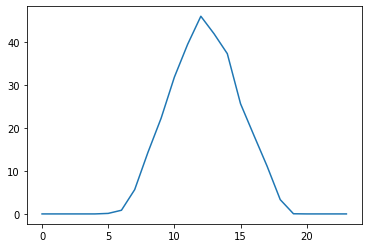

In [46]:
plt.plot(predict)

# 결과

In [47]:
result = data2.iloc[-24:,]
result.quantity = predict
result.to_csv('./result_미래발전량예측.csv')

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
